# Feature Engineering

**Feature Engineering (Проектирование/конструирование признаков)** — это процесс преобразования необработанных данных в признаки, подходящие для моделей машинного обучения. Другими словами, это процесс выбора, извлечения и преобразования наиболее релевантных признаков из доступных данных для построения более точных и эффективных моделей машинного обучения.

Успех моделей машинного обучения во многом зависит от качества признаков, используемых для их обучения. Инженерия признаков включает в себя набор методов, которые позволяют нам создавать новые признаки путем комбинирования или преобразования существующих. Эти методы помогают выделить наиболее важные закономерности и взаимосвязи в данных, что, в свою очередь, помогает модели машинного обучения более эффективно обучаться на основе данных.

**Задачи Feature Engineering:**

1. Преобразование сырых данных в информативные признаки
2. Добавление контекстных новых признаков
3. Кодирование категориальных признаков (Encoding)
4. Работа с числовыми признаками (масштабирование, Логарифмирование, создание Полиномиальных признаков и т.д.)
5. Создание агрегированных признаков
6. Работа с пропусками и аномалиями

Простыми словами, Feature Engineering — это как конструктор, где мы строим полезные признаки, чтобы дать модели больше информации.

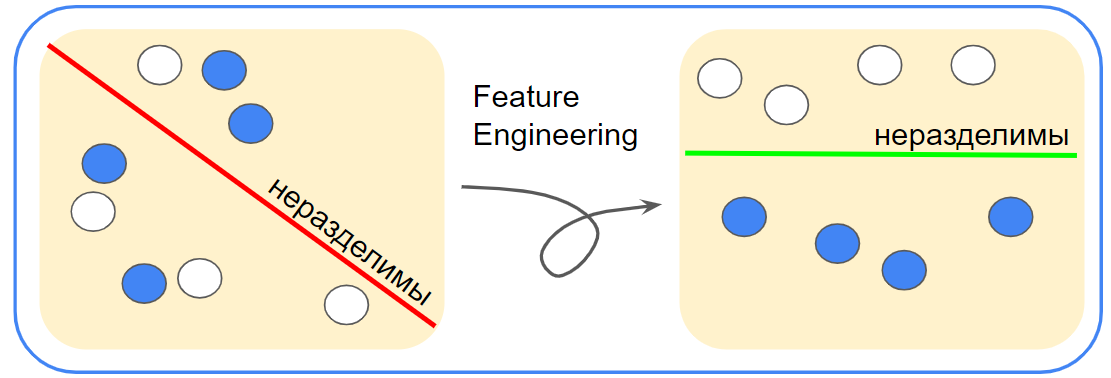

https://habr.com/ru/companies/ruvds/articles/680498/

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/competitions/electricity-consumption")
# {"username":"adele1997","key":"72a5b06391529c16b0e444311c9af408"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········


100%|██████████| 317k/317k [00:00<00:00, 647kB/s]


Extracting archive ./electricity-consumption/electricity-consumption.zip to ./electricity-consumption


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/electricity-consumption/train.csv")
df

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     34946 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [ ]:
# просто удаляем пропуски
df = df[~df['total'].isna()]
df['total'] = df['total'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34946 entries, 1 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  34946 non-null  object
 1   total     34946 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 819.0+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%d.%m.%Y %H:%M:%S")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34946 entries, 1 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  34946 non-null  datetime64[ns]
 1   total     34946 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 819.0 KB


In [ ]:
# set_index - в качестве индексов датафрейма устанавливает дату и время
# resample - группируем данные в данном случае по D - т.е. за день
# и вычислем сумму по колонке total за день
df.set_index('datetime').resample('D').sum()

,total
datetime,
2005-01-01,4129088
2005-01-02,4435598
2005-01-03,4564706
2005-01-04,4656749
2005-01-05,4684819
...,...
2008-12-27,4169202
2008-12-28,4246856
2008-12-29,4143817


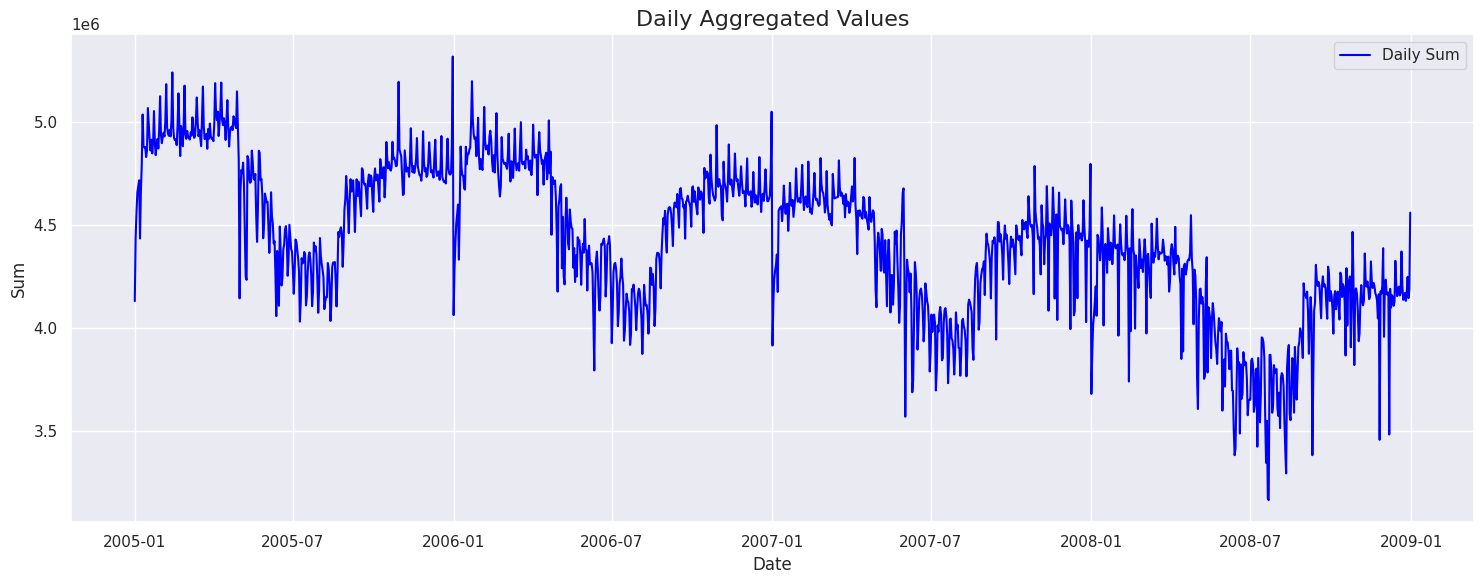

In [ ]:
import matplotlib.pyplot as plt

df_2 = df.set_index('datetime').resample('D').sum()

# Построение графика
plt.figure(figsize=(15, 6))
plt.plot(df_2.index, df_2.values, label='Daily Sum', color='blue')

# Настройки графика
plt.title('Daily Aggregated Values', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sum', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показать график
plt.show()

Временные признаки (Time-based Features):
Извлечём полезные компоненты даты и времени:

- `hour` — час (можно выявить пиковые часы нагрузки)
- `day` — день месяца
- `month` — месяц (сезонность)
- `day_of_week` — день недели (выходные и будни)
- `is_weekend` — выходной или нет (0 или 1)
- `quarter` — квартал года
- `season` — сезон (зима, весна, лето, осень)
- `is_holiday` — праздничный день (по календарю праздников)

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['season'] = df['datetime'].dt.quarter
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofyear'] = df['datetime'].dt.day_of_year
df['dayofweek'] = df['datetime'].dt.day_of_week
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

df

,datetime,total,year,month,season,day,hour,dayofyear,dayofweek,is_weekend
1,2005-01-01 01:00:00,154139,2005,1,1,1,1,1,5,1
2,2005-01-01 02:00:00,157818,2005,1,1,1,2,1,5,1
3,2005-01-01 03:00:00,149310,2005,1,1,1,3,1,5,1
4,2005-01-01 04:00:00,138282,2005,1,1,1,4,1,5,1
5,2005-01-01 05:00:00,132032,2005,1,1,1,5,1,5,1
...,...,...,...,...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376,2008,12,4,31,19,366,2,0
35060,2008-12-31 20:00:00,246510,2008,12,4,31,20,366,2,0
35061,2008-12-31 21:00:00,226469,2008,12,4,31,21,366,2,0
35062,2008-12-31 22:00:00,199907,2008,12,4,31,22,366,2,0


In [ ]:
df['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

Добавление тригонометрических функций к данным полезно, когда в данных присутствуют циклические признаки (например, время суток, дни недели, месяцы и так далее). Эти циклические признаки имеют естественную структуру, где значения «заворачиваются» (например, после 23 часов следует 0, а после декабря — январь). Применение тригонометрических функций позволяет модели лучше учитывать эту цикличность.

In [ ]:
import math
import numpy as np

#добавление тригонометрических функций от данных
def add_trigonom(df):

    # Эти признаки помогают учитывать сезонность
    # (летом значения будут отличаться от зимних)
    df['sin_month'] = df['month'].apply(math.sin)
    df['cos_month'] = df['month'].apply(math.cos)

    # Это помогает моделям учитывать повторяющиеся суточные паттерны
    # (например, 0:00 и 23:00 — близкие по времени).
    df['sin_hour'] = df['hour'].apply(math.sin)
    df['cos_hour'] = df['hour'].apply(math.cos)

    df['sin**2_hour'] = df['sin_hour'] * df['sin_hour']
    df['cos**2_hour'] = df['cos_hour'] * df['cos_hour']

    # Преобразуем hour в диапазон [0, 2π] (нормализация)
    # Это более корректный метод представления часов в круговой форме (час 23 близок к 0).
    df['hour_sin'] = (df['hour'] / 23 * 2 * np.pi).apply(math.sin)
    df['hour_cos'] = (df['hour'] / 23 * 2 * np.pi).apply(math.cos)

    df['month_sin'] = ((df['month'] - 1) / 11 * 2 * np.pi).apply(math.sin)
    df['month_cos'] = ((df['month'] - 1) / 11 * 2 * np.pi).apply(math.cos)

    df['hour_sin**2'] = df['hour_sin'] * df['hour_sin']
    df['month_cos**2'] = df['month_cos'] * df['month_cos']

    day = 24
    year = 365.2425*day # количество часов в году (с учетом високосных лет)

    # day_sin и day_cos — синус и косинус текущего часа в 24-часовом цикле.
    df['day_sin'] = (df.index.hour * 2 * np.pi / day)
    df['day_sin'] = df['day_sin'].apply(math.sin)
    df['day_cos'] = (df.index.hour * 2 * np.pi / day)
    df['day_cos'] = df['day_cos'].apply(math.cos)

    # year_sin и year_cos — синус и косинус текущего часа в годовом цикле.
    df['year_sin'] = (df.index.hour * 2 * np.pi / year)
    df['year_sin'] = df['year_sin'].apply(math.sin)
    df['year_cos'] = (df.index.hour * 2 * np.pi / year)
    df['year_cos'] = df['year_cos'].apply(math.cos)

    return df

df = df.set_index('datetime')
df = add_trigonom(df)

df

,total,year,month,season,day,hour,dayofyear,dayofweek,is_weekend,sin_month,...,hour_sin,hour_cos,month_sin,month_cos,hour_sin**2,month_cos**2,day_sin,day_cos,year_sin,year_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 01:00:00,154139,2005,1,1,1,1,1,5,1,0.841471,...,2.697968e-01,0.962917,0.000000e+00,1.0,7.279030e-02,1.0,0.258819,0.965926,0.000717,1.000000
2005-01-01 02:00:00,157818,2005,1,1,1,2,1,5,1,0.841471,...,5.195840e-01,0.854419,0.000000e+00,1.0,2.699675e-01,1.0,0.500000,0.866025,0.001434,0.999999
2005-01-01 03:00:00,149310,2005,1,1,1,3,1,5,1,0.841471,...,7.308360e-01,0.682553,0.000000e+00,1.0,5.341212e-01,1.0,0.707107,0.707107,0.002150,0.999998
2005-01-01 04:00:00,138282,2005,1,1,1,4,1,5,1,0.841471,...,8.878852e-01,0.460065,0.000000e+00,1.0,7.883402e-01,1.0,0.866025,0.500000,0.002867,0.999996
2005-01-01 05:00:00,132032,2005,1,1,1,5,1,5,1,0.841471,...,9.790841e-01,0.203456,0.000000e+00,1.0,9.586057e-01,1.0,0.965926,0.258819,0.003584,0.999994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31 19:00:00,249376,2008,12,4,31,19,366,2,0,-0.536573,...,-8.878852e-01,0.460065,-2.449294e-16,1.0,7.883402e-01,1.0,-0.965926,0.258819,0.013618,0.999907
2008-12-31 20:00:00,246510,2008,12,4,31,20,366,2,0,-0.536573,...,-7.308360e-01,0.682553,-2.449294e-16,1.0,5.341212e-01,1.0,-0.866025,0.500000,0.014335,0.999897
2008-12-31 21:00:00,226469,2008,12,4,31,21,366,2,0,-0.536573,...,-5.195840e-01,0.854419,-2.449294e-16,1.0,2.699675e-01,1.0,-0.707107,0.707107,0.015052,0.999887


In [ ]:
df.head()

,total,year,month,season,day,hour,dayofyear,dayofweek,is_weekend,sin_month,...,hour_sin,hour_cos,month_sin,month_cos,hour_sin**2,month_cos**2,day_sin,day_cos,year_sin,year_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 01:00:00,154139,2005,1,1,1,1,1,5,1,0.841471,...,0.269797,0.962917,0.0,1.0,0.072790,1.0,0.258819,0.965926,0.000717,1.000000
2005-01-01 02:00:00,157818,2005,1,1,1,2,1,5,1,0.841471,...,0.519584,0.854419,0.0,1.0,0.269967,1.0,0.500000,0.866025,0.001434,0.999999
2005-01-01 03:00:00,149310,2005,1,1,1,3,1,5,1,0.841471,...,0.730836,0.682553,0.0,1.0,0.534121,1.0,0.707107,0.707107,0.002150,0.999998
2005-01-01 04:00:00,138282,2005,1,1,1,4,1,5,1,0.841471,...,0.887885,0.460065,0.0,1.0,0.788340,1.0,0.866025,0.500000,0.002867,0.999996
2005-01-01 05:00:00,132032,2005,1,1,1,5,1,5,1,0.841471,...,0.979084,0.203456,0.0,1.0,0.958606,1.0,0.965926,0.258819,0.003584,0.999994


In [ ]:
df.isna().sum()

,0
total,0
year,0
month,0
day,0
hour,0
dayofyear,0
dayofweek,0
sin_month,0
cos_month,0
sin_hour,0


# Feature Selection

**Выделение или отбор признаков (Feature selection)** – это процедура отбрасывания незначащих переменных из очищенной выборки перед запуском машинного обучения и интеллектуального анализа данных (Data Mining). Сокращение числа предикторов необходимо по нескольким причинам:

- **значимость признаков** – как правило, исходная выборка всегда содержит много «мусорных данных»: шумов, выбросов, а на реальный результат влияют лишь несколько предикторов;
- **точность решения** – некоторые модели Machine Learning чувствительны к величине входного вектора. Например, у нейросетей большое число входных данных может привести к переобучению. Меньше вводящих в заблуждение данных означает повышение точности моделирования.;
- **скорость вычислений** – чем меньше переменных, тем быстрее будут идти расчеты.

**Методы отбора признаков принято делить на несколько категорий:**

1. Методы фильтрации (filter methods)
2. Оберточные методы (wrapper methods)
3. Встроенные методы (embedded methods)

## Методы фильтрации (filter methods)

Методы фильтрации (filter methods), основанные на теории вероятностей и статистических подходах. Наиболее популярными в этой группе методов считаются **IG-индексирование (вычисление information gain)**, **хи-квадрат (chi-square)** и **mRmR**, которые позволяют ранжировать признаки по значимости, оценив степень корреляции каждого из них с целевой переменной. Далее модель машинного обучения использует только те предикторы, которые соответствуют определенным критериям.

Методы фильтрации хороши тем, что они достаточно быстро работают: у них низкая стоимость вычислений, которая зависит линейно от общего количества предикторов. Однако, они рассматривают каждый признак изолированно, не учитывая их взаимное влияние друг на друга в частности и на целевую переменную вообще. Поэтому точность моделирования с этими методами отбора признаков недостаточно высока.

**Прирост информации (Information Gain, IG)**

Вычисляет уменьшение энтропии в результате преобразования набора данных. Его можно использовать для отбора признаков путем оценки информационного прироста каждой переменной в контексте целевой переменной.

- Прирост информации — это снижение энтропии за счет преобразования набора данных.
- Прирост информации рассчитывается путем сравнения энтропии набора данных до и после преобразования.

Information Gain расчитывается по формуле:

$IG(Y|X) = H(X)-H(Y|X)$

IG это по сути мера того, насколько более упорядоченной становится для нас переменная Y, если мы знаем значения X. Или, говоря проще, существует ли корреляция между значениями X и Y, и насколько она велика.

Чем больше параметр IG — тем сильнее корреляция. Таким образом, мы легко можем вычислить information gain для всех признаков и выкинуть те, которые слабо влияют на целевую переменную.

<Axes: >

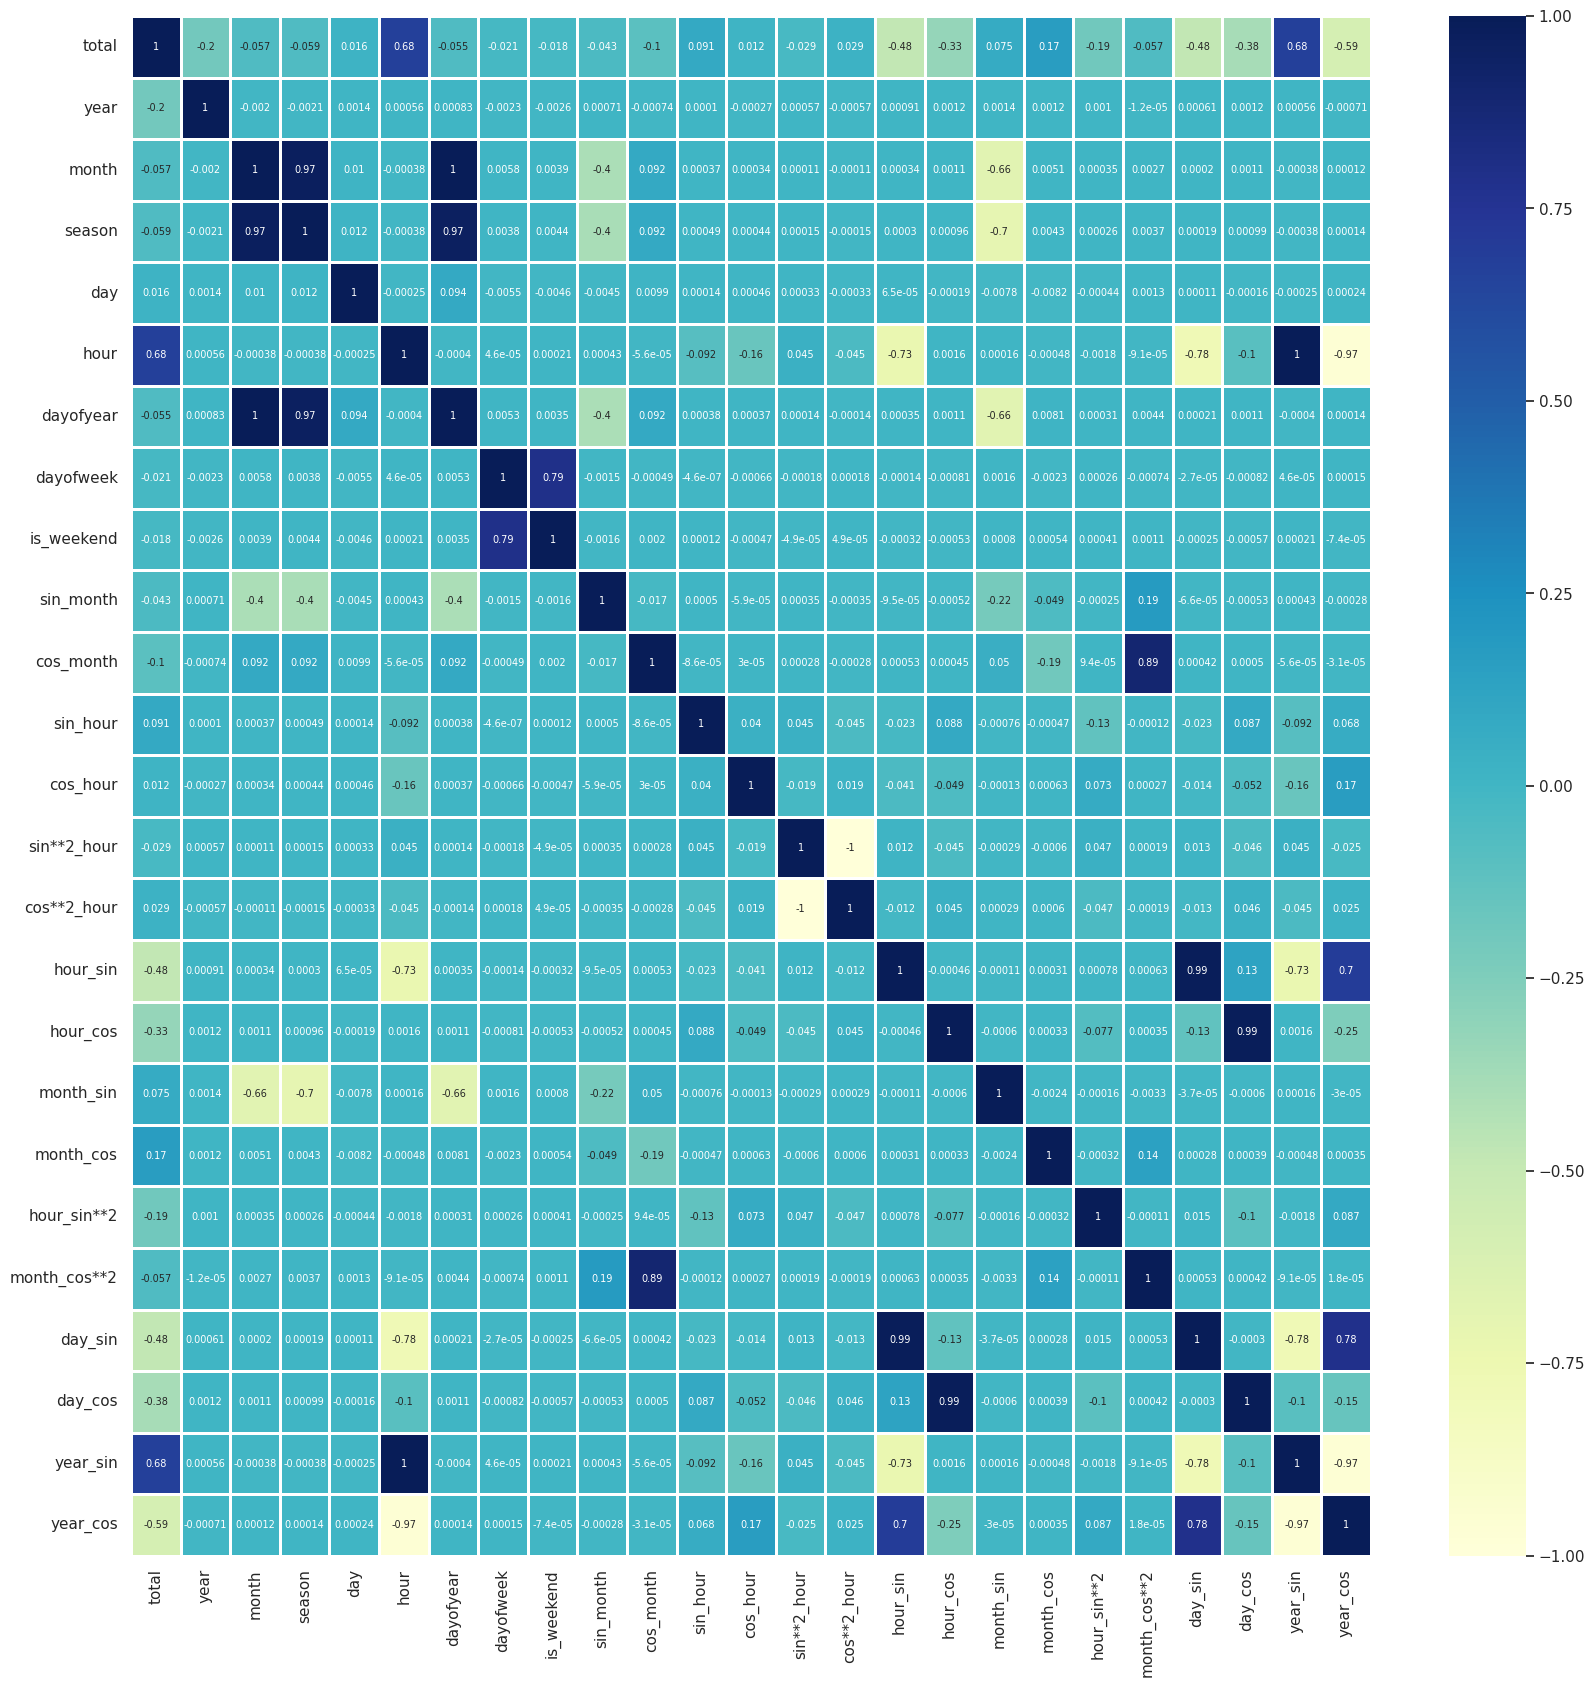

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (20, 20)})

sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap="YlGnBu",
            linecolor='white',
            linewidths=1,
            annot_kws={"size": 7})  # Изменяем размер шрифта

`mutual_info_classif` — это функция из библиотеки `sklearn.feature_selection`, которая вычисляет взаимную информацию между признаками и целевой переменной. Она помогает понять, насколько информация одного признака уменьшает неопределенность относительно целевой переменной.

Взаимная информация показывает нелинейные зависимости, что делает её более мощным инструментом, чем, например, простая корреляция.

**Взаимная информация (Mutual Information, MI)** — это мера, которая показывает, сколько информации один признак содержит о целевой переменной.

Если $X$ — это признак, а $Y$ — целевая переменная, то взаимная информация между ними определяется как:

$$MI(X,Y)=H(Y)−H(Y∣X)$$

где:
- $H(Y)$ — энтропия целевой переменной
- $Y$ (измеряет неопределенность).
- $H(Y∣X)$ — условная энтропия $Y$, если известен $X$.

____
- Если $MI(X, Y) = 0$, значит, признак $X$ не содержит информации о целевой переменной $Y$.
- Если $MI(X, Y) > 0$, значит, признак полезен для предсказания $Y$.

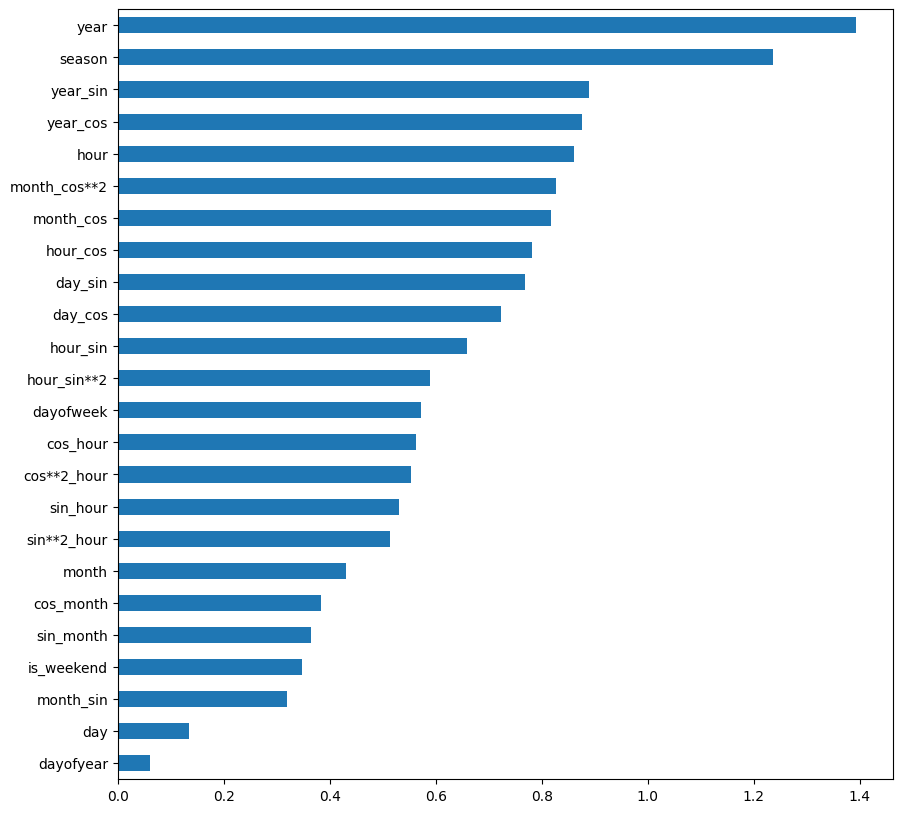

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X = df.drop(columns=['total'])
y = df['total']

importances = mutual_info_classif(X, y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10,10))
feature_importances.plot(kind='barh')
plt.show()

In [ ]:
feature_importances

,0
dayofyear,0.061279
day,0.134486
month_sin,0.318534
is_weekend,0.348592
sin_month,0.365240
cos_month,0.383798
month,0.431036
sin**2_hour,0.514643
sin_hour,0.531075
cos**2_hour,0.552577


In [ ]:
# Применение в отборе признаков:
# Функция особенно полезна в методах фильтрации:

from sklearn.feature_selection import SelectKBest

# Оставим только 5 лучших признака
selector = SelectKBest(mutual_info_classif, k=5)

X_selected = selector.fit_transform(X, y)

X_selected

array([[2.00500000e+03, 1.00000000e+00, 1.00000000e+00, 7.16782317e-04,
        9.99999743e-01],
       [2.00500000e+03, 1.00000000e+00, 2.00000000e+00, 1.43356427e-03,
        9.99998972e-01],
       [2.00500000e+03, 1.00000000e+00, 3.00000000e+00, 2.15034548e-03,
        9.99997688e-01],
       ...,
       [2.00800000e+03, 4.00000000e+00, 2.10000000e+01, 1.50518615e-02,
        9.99886714e-01],
       [2.00800000e+03, 4.00000000e+00, 2.20000000e+01, 1.57685588e-02,
        9.99875669e-01],
       [2.00800000e+03, 4.00000000e+00, 2.30000000e+01, 1.64852479e-02,
        9.99864109e-01]])

**Критерий хи-квадрат (Chi-square Test)**

Используется для категориальных признаков в датасете. Мы вычисляем хи-квадрат между каждым признаком и целью, после выбираем желаемое количество признаков с лучшими показателями. По сути хи-квадрат проверяет, есть ли значимая разница между наблюдаемой и ожидаемой частотами двух категориальных переменных. Таким образом, проверяется нулевая гипотеза об отсутствии связи между двумя переменными.

Чтобы правильно применить критерий для проверки связи между различными функциями в наборе данных и целевой переменной, должны быть выполнены следующие условия: категориальные переменные, которые выбираются независимо, и частота значений > 5.

Стоит отметить, что этот тип тестов требует неотрицательных и правильно отмасштабированных признаков.

$$
\chi_c^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

Когда две функции независимы, наблюдаемое количество близко к ожидаемому количеству, поэтому у нас будет меньшее значение хи-квадрата. Столь высокое значение хи-квадрат указывает на то, что гипотеза о независимости неверна. Проще говоря, чем выше значение хи-квадрат, тем функция больше зависит от ответа, и ее можно выбрать для обучения модели.

Пример расчета хи квадрата простыми словами: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

**Критерий Фишера (F-тест)**

Критерий Фишера – один из наиболее широко используемых методов контролируемого выбора признаков. Алгоритм, который мы будем использовать, возвращает ранги переменных на основе оценки критерия в порядке убывания, после чего уже следует их отбор.

F-тест проверяет, насколько различаются средние значения целевой переменной для разных значений признака. Он особенно полезен для отбора признаков при работе с регрессией и ANOVA (дисперсионным анализом).

Пример:
- $X$ — цена автомобиля.
- $Y$ — уровень дохода покупателя.

Если средний доход сильно отличается для разных цен автомобилей, значит, цена автомобиля важный признак.

**Как работает F-тест?**

`F-тест` сравнивает дисперсии и проверяет, объясняет ли признак различия в целевой переменной.

1. Вычисляем межгрупповую дисперсию ($SSB$)
Определяем, насколько средние значения целевой переменной различаются между группами (значениями признака).

$$SSB = \sum n_i (\overline{Y_i} - \overline{Y})^2$$

Где:
- $n_i$ — количество элементов в группе.
- $\overline{Y_i} — среднее значение целевой переменной в группе.
- $\overline{Y}$ — общее среднее значение.

2. Вычисляем внутригрупповую дисперсию ($SSW$)
Определяем, насколько значения внутри каждой группы отличаются от их средних.

$$SSW = \sum (Y_{ij} - \overline{Y_i})^2$$

Где $Y_{ij}$ — значение целевой переменной для элемента $j$ в группе $i$.

3. Вычисляем статистику F

$$ \frac{SSB/(k-1)}{SSW/(n-k)}$$

Где:
- $k$ — количество групп (уникальных значений признака).
- $n$ — общее число элементов.

Если F-статистика высокая, значит, признак хорошо объясняет различия в целевой переменной.

In [ ]:
!pip install skfeature-chappers --quiet

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10,10))
feature_importances.plot(kind='barh', color='teal')
plt.show()

KeyboardInterrupt: 

## Оберточные методы (wrapper methods)

Оберточные методы (wrapper methods) – поисковые алгоритмы, которые рассматривают предикторы как входы, а эффективность модели как выходы, которые должны быть оптимизированы. Классификатор запускается на разных подмножествах признаков исходной тренировочной выборки. В этой категории есть 2 подхода: включение (forward selection) и исключение (backwards selection) предикторов. Методы включения начинают с пустого подмножества, куда постепенно добавляются разные признаки. В случае исключения метод стартует с исходного множества признаков, постепенно удаляя из него переменные и пересчитывая классификатор. Далее выбирается подмножество признаков с наилучшими параметрами на обучающей выборке и тестируется на контрольном (тестовом) датасете. Есть много способов перебора предикторов: рекурсивное удаление и добавление, генетические алгоритмы, имитация отжига и т.д.. Оберточные методы отслеживают взаимосвязи между признаками, однако они требуют большего количества времени, чем фильтрация.

**Существующие стратегии отбора:**

- Прямой отбор (Forward selection): начинаем с пустого набора признаков, а затем итеративно добавляем признаки, обеспечивающие наилучший прирост качества моделей.
- Обратный отбор (Backward selection): начинаем с набора, состоящего из всех признаков, далее, на каждой итерации убираем «худший» признак.

In [ ]:
X = df.drop(columns=['total'])
y = df['total']

X.shape, y.shape

((34946, 24), (34946,))

In [ ]:
%%time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

sfs = SequentialFeatureSelector(clf, n_features_to_select = 5)

sfs.fit(X, y)

CPU times: user 3.62 s, sys: 2.64 s, total: 6.27 s
Wall time: 4.29 s


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
sfs.n_features_in_

24

In [ ]:
sfs.feature_names_in_

array(['year', 'month', 'season', 'day', 'hour', 'dayofyear', 'dayofweek',
       'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour',
       'sin**2_hour', 'cos**2_hour', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'hour_sin**2', 'month_cos**2', 'day_sin', 'day_cos',
       'year_sin', 'year_cos'], dtype=object)

In [ ]:
sfs.n_features_to_select_

5

In [ ]:
# Support указывает на то был выбран признак или нет
sfs.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True])

In [ ]:
pd.DataFrame(sfs.support_, index=X.columns, columns=["Rank"])

,Rank
year,True
month,False
season,False
day,False
hour,False
dayofyear,False
dayofweek,False
is_weekend,False
sin_month,False
cos_month,False


**Рекурсивное исключение признаков**

Первым элементом, необходимым для рекурсивного исключения признаков (recursive feature elimination), является оценщик, например, линейная модель или дерево решений.

У таких моделей есть коэффициенты для линейных моделей и важности признаков в деревьях решений. Для выбора оптимального количества признаков нужно обучить оценщика и выбрать признаки с помощью коэффициентов или значений признаков. Наименее важные признаки будут удаляться. Этот процесс будет повторяться рекурсивно о тех пор, пока не будет получено оптимальное число признаков.

`sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')`

- **estimator** – оценщик машинного обучения, который может выдать важность признаков за счет атрибутов coef_ или feature_importances attributes.
- **n_features_to_select** – количество признаков для выбора. Отбирает половину по умолчанию.
- **step** – целое число, указывает количество признаков, которые будут удалены на каждой итерации, или число в диапазоне от 0 до 1, указывающее процент признаков, подлежащих удалению на каждой итерации.

In [ ]:
%%time
from sklearn.feature_selection import RFE
import numpy as np

clf = LinearRegression()

rfe = RFE(clf, n_features_to_select=6)
rfe.fit(X, y)

CPU times: user 623 ms, sys: 27.7 ms, total: 651 ms
Wall time: 744 ms


RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
rfe.ranking_

array([ 8, 16, 13, 18,  1, 19, 15, 11, 12, 14,  9, 17,  2,  3,  1,  1, 10,
        6,  5,  7,  1,  4,  1,  1])

In [ ]:
# Support указывает на то был выбран признак или нет
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True])

## Встроенные методы (embedded methods)

Встроенные методы (embedded methods) не разделяют отбор признаков и обучение классификатора, а выделяют предикторы во время процесса расчета модели. Эти алгоритмы требуют меньше вычислений, чем оберточные методы, но больше, чем фильтрация.

Основным методом этой категории является **регуляризация** – добавление дополнительных ограничений (штрафов) к условиям задачи, чтобы построить алгоритм, минимизирующий ошибку и количество используемых переменных.

**При этом выделяют 2 подхода:**
- L1 (лассо, lasso regression, регуляризация через манхэттенское расстояние)
- L2 (регуляризация Тихонова или ридж-регрессия, ridge regression).

Регуляризация позволяет выявить взаимовлияние переменных, но занимает больше времени, чем методы фильтрации

**Регуляризация LASSO (L1)**

Лассо штрафует весовые коэффициенты модели для изменения их важности для модели и может даже обнулить их (т.е. убрать эти переменные из конечной модели). Обычно Лассо используется, если набор данных содержит большое число переменных и требуется исключить некоторые из них, чтобы лучше понять, как важные признаки влияют на модель (т.е. те признаки, которые были выбраны Лассо и у которых установлена важность).

**L2 Регуляризация — методом Ridge:** Задачей Ridge является сохранение всех переменных и в то же время присвоение им важности на основе вклада в эффективность модели. Ridge будет хорошим выбором, если набор данных содержит небольшое число переменных и все они необходимы для интерпретации выводов и полученных результатов.

Так как Ridge оставляет все переменные, а Лассо лучше устанавливает их важность, был разработан алгоритм, объединяющий лучшие особенности обеих регуляризаций и известный как Elastic-Net.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Обучаем RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Выводим важность признаков
feature_importances = pd.Series(model.feature_importances_)
print("Важность признаков:\n", feature_importances.sort_values(ascending=False))

# Создание Pipeline

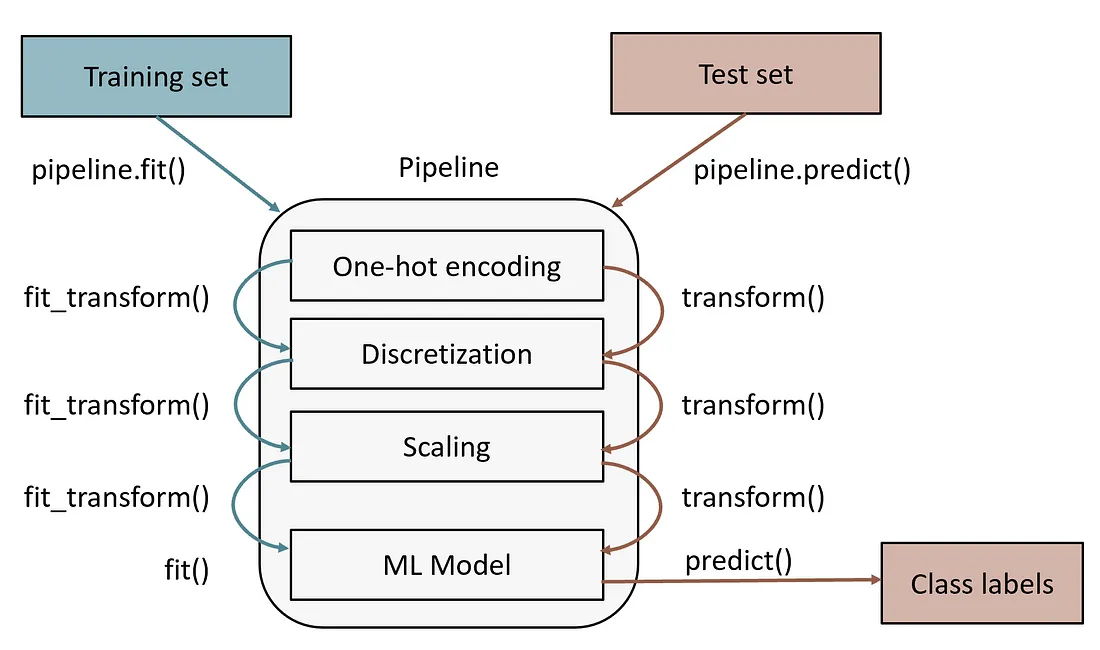

https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2

**Пайплайн (pipeline)** в контексте машинного обучения — это последовательность шагов (процессов), которые применяются к данным для их обработки и обучения модели. Эти шаги могут включать в себя:
- Предобработку данных (например, обработка пропусков, кодирование категориальных признаков, масштабирование данных и т.д.)
- Обучение модели (например, линейная регрессия, случайный лес, градиентный бустинг и т.д.)
- Оценку модели (например, предсказания и вычисление метрик).

**Пайплайн** позволяет объединить все эти шаги в одну цепочку, чтобы все операции выполнялись последовательно. Это помогает упорядочить работу, избежать ошибок и упростить управление процессом машинного обучения.

**Зачем нужен пайплайн?**
1. Чистота кода: Пайплайн позволяет собрать весь процесс обработки данных и обучения модели в одном месте. Это улучшает читаемость и структуру кода.
2. Избежание утечек данных: Когда вы обрабатываете данные, например, масштабируете их или проводите другие преобразования, важно, чтобы эти шаги проводились только на обучающих данных, а не на тестовых. Пайплайн автоматически решает эту задачу, разделяя данные на обучающие и тестовые наборы.
3. Удобство: Пайплайн позволяет легко повторить весь процесс обработки и обучения модели, передав только исходные данные. Это экономит время и силы, особенно при тестировании разных моделей или методов предобработки.
4. Повторяемость: После того как пайплайн настроен, его можно повторно использовать на других данных или в будущем. Это упрощает работу в командных проектах и при повторных экспериментах.
5. Управление гиперпараметрами: Когда несколько шагов в пайплайне (например, масштабирование и обучение модели) имеют гиперпараметры, пайплайн позволяет удобно настроить их с помощью GridSearchCV или RandomizedSearchCV.

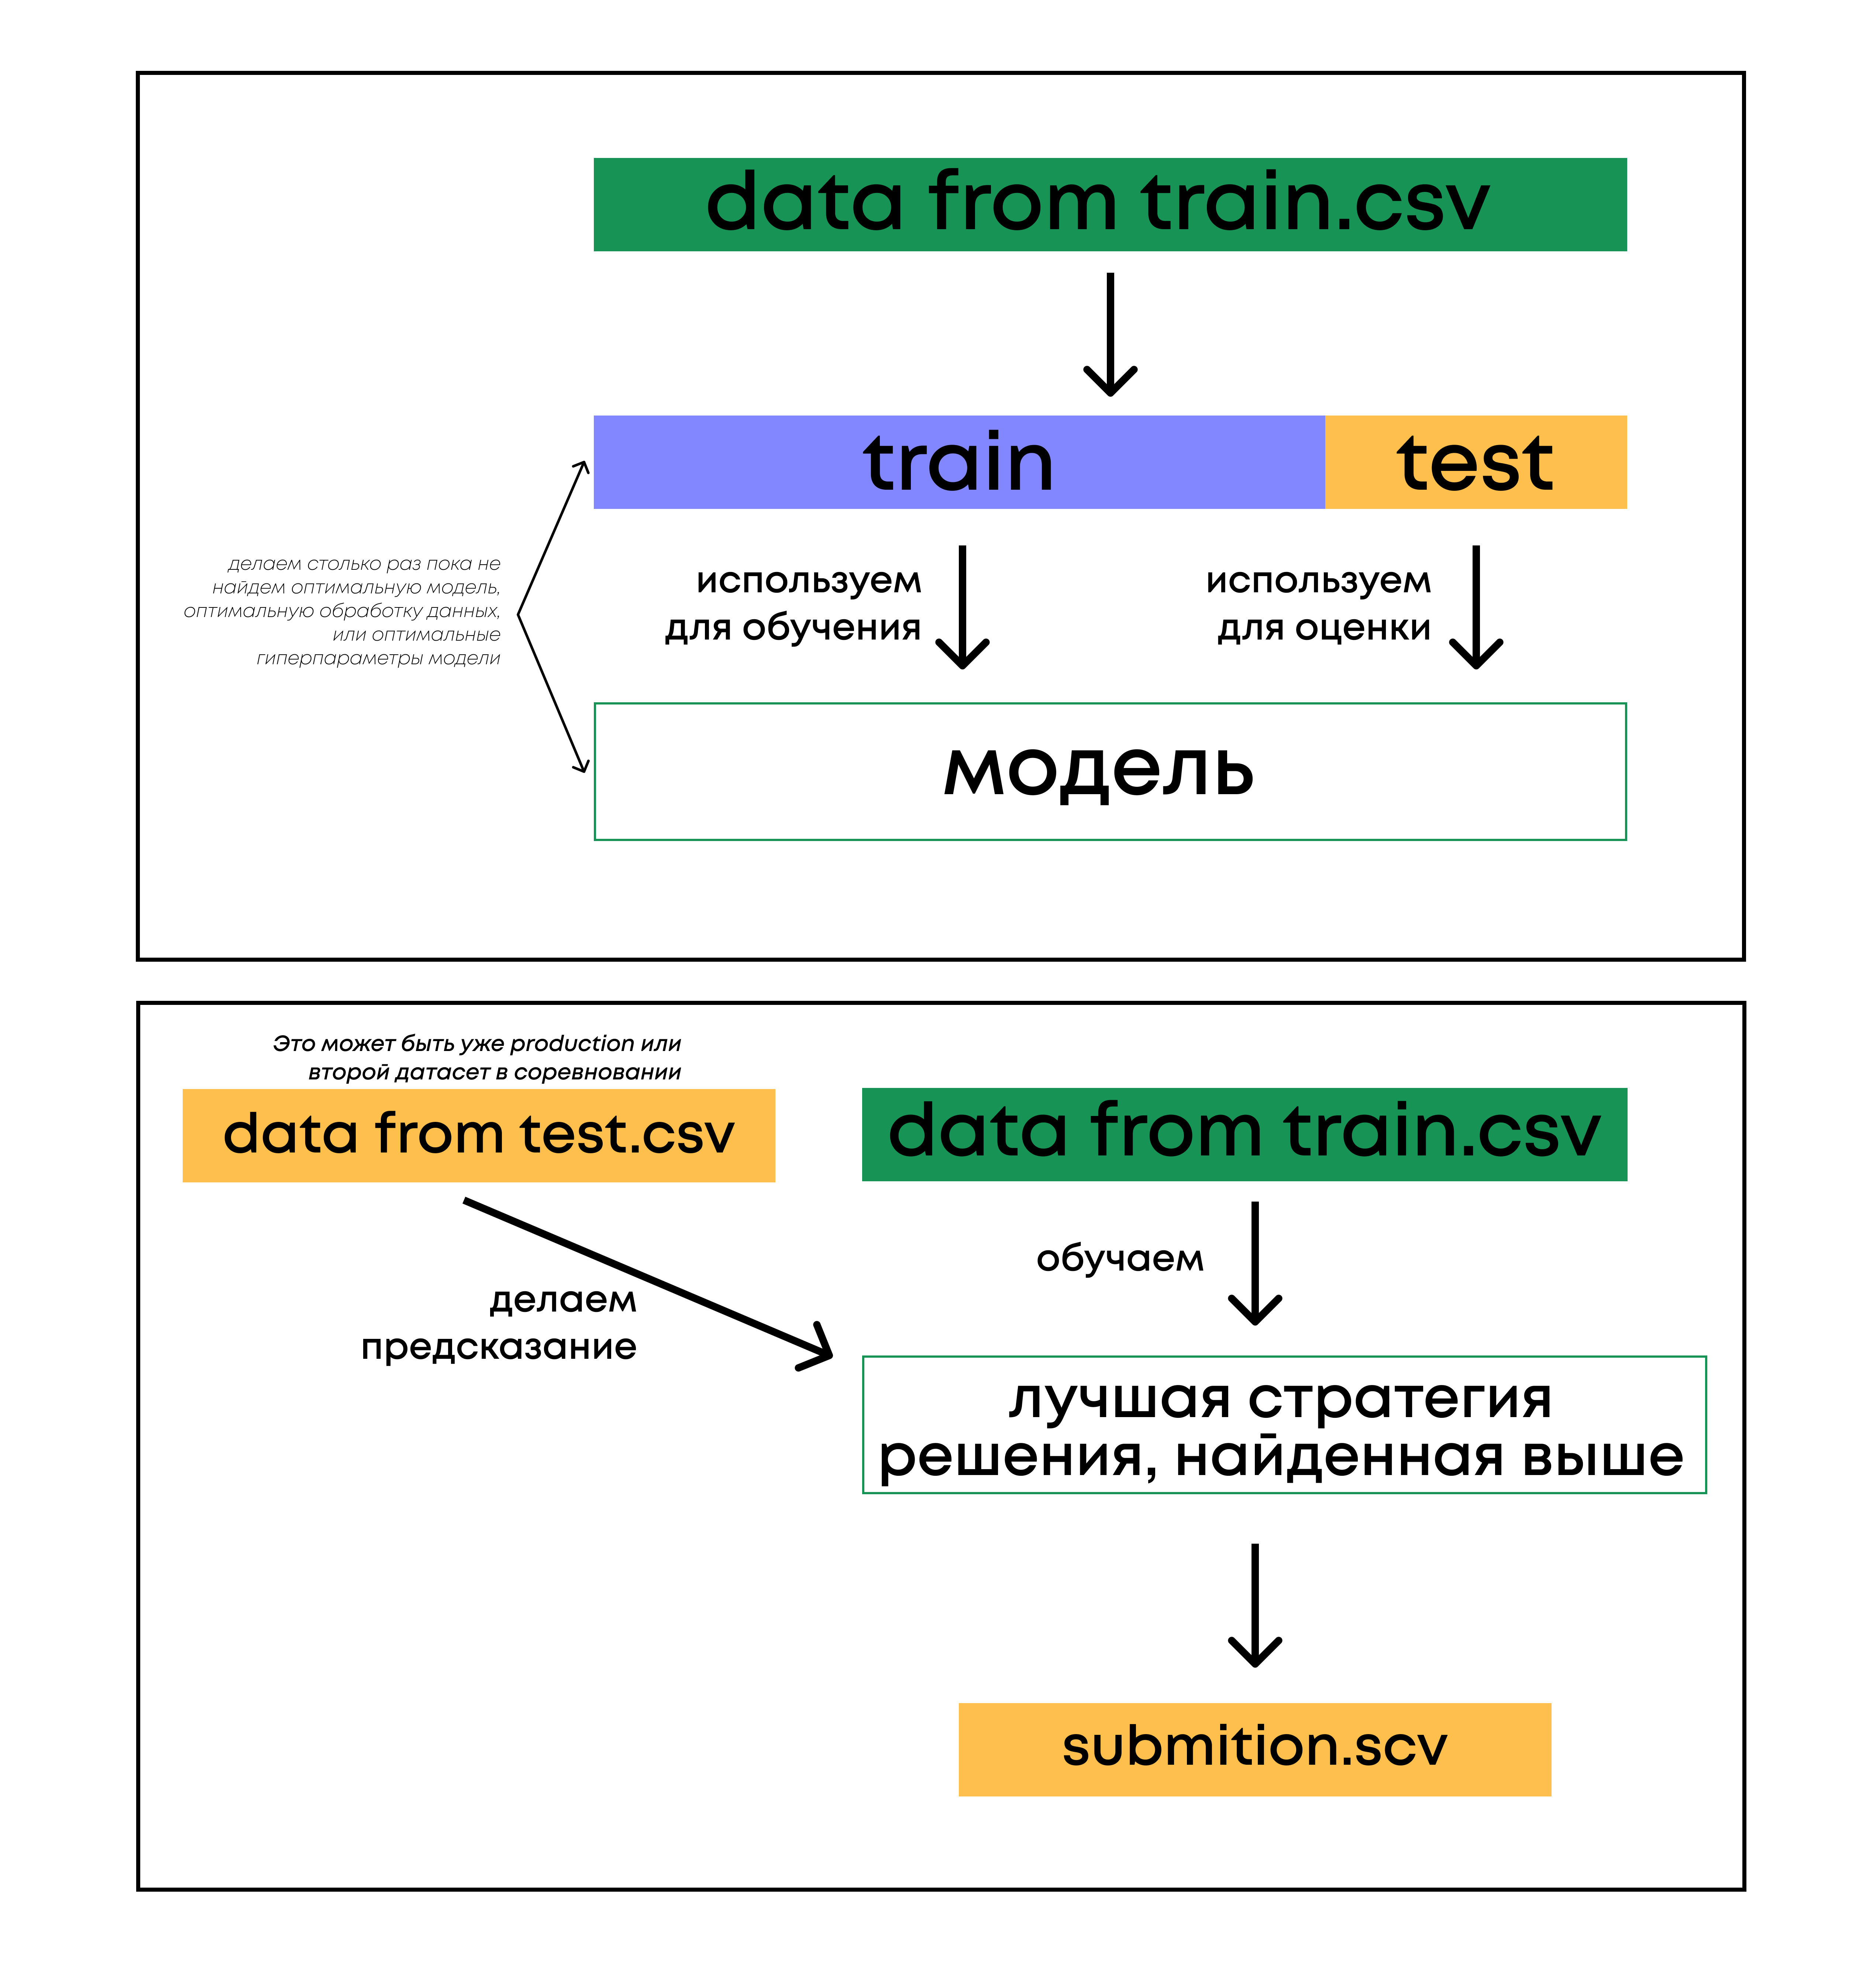

В `Scikit-learn` пайплайн реализуется с помощью класса `Pipeline`. Этот класс объединяет несколько этапов в одну структуру, и позволяет выполнять все операции последовательно.

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class TimeFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Мы не нуждаемся в обучении для этой трансформации

    def transform(self, X):
        # Извлекаем временные признаки
        X['year'] = X['datetime'].dt.year
        X['month'] = X['datetime'].dt.month
        X['season'] = X['datetime'].dt.quarter
        X['day'] = X['datetime'].dt.day
        X['hour'] = X['datetime'].dt.hour
        X['dayofyear'] = X['datetime'].dt.day_of_year
        X['dayofweek'] = X['datetime'].dt.day_of_week
        X['is_weekend'] = X['dayofweek'].isin([5, 6]).astype(int)

        # Убираем колонку 'datetime' после обработки
        X = X.drop(columns=['datetime'])

        return X

In [ ]:
class TrigonometricFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Добавляем тригонометрические признаки для временных признаков
        X['sin_month'] = X['month'].apply(math.sin)
        X['cos_month'] = X['month'].apply(math.cos)

        X['sin_hour'] = X['hour'].apply(math.sin)
        X['cos_hour'] = X['hour'].apply(math.cos)

        X['hour_sin'] = (X['hour'] / 23 * 2 * np.pi).apply(math.sin)
        X['hour_cos'] = (X['hour'] / 23 * 2 * np.pi).apply(math.cos)

        X['month_sin'] = ((X['month'] - 1) / 11 * 2 * np.pi).apply(math.sin)
        X['month_cos'] = ((X['month'] - 1) / 11 * 2 * np.pi).apply(math.cos)

        # Преобразуем дату в индекс, если нужно для дальнейшего использования
        day = 24
        year = 365.2425 * day

        X['day_sin'] = (X['hour'] * 2 * np.pi / day).apply(math.sin)
        X['day_cos'] = (X['hour'] * 2 * np.pi / day).apply(math.cos)

        X['year_sin'] = (X['hour'] * 2 * np.pi / year).apply(math.sin)
        X['year_cos'] = (X['hour'] * 2 * np.pi / year).apply(math.cos)

        return X

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline_preprocessing = Pipeline([
    ('time_features', TimeFeaturesExtractor()), # призанки даты и времени
    ('trigonometric_features', TrigonometricFeaturesExtractor()), # Тригонометрические признаки
    # ('dummies', DummiesCreator()), # кодирование
    # ('scaler', StandardScaler())  # Масштабирование данных
])

In [ ]:
import pandas as pd

df = pd.read_csv("/content/electricity-consumption/train.csv")

# просто удаляем пропуски
df = df[~df['total'].isna()]
df['total'] = df['total'].astype('int64')

# Преобразуем строковый столбец 'datetime' в формат datetime
df['datetime'] = pd.to_datetime(df['datetime'], format="%d.%m.%Y %H:%M:%S")

# Разделяем данные на train и test, извлекая год прямо из 'datetime'
train = df[df['datetime'].dt.year != 2008]
test = df[df['datetime'].dt.year == 2008]

# Удалим ненужные колонки (например, целевую переменную) из обучающих данных
X_train = train.drop(columns=['total'])
y_train = train['total']

# Применим пайплайн и обучим модель
pipeline_preprocessing.fit(X_train, y_train)

Pipeline(steps=[('time_features', TimeFeaturesExtractor()),
                ('trigonometric_features', TrigonometricFeaturesExtractor())])

In [ ]:
# Удалим ненужные колонки из тестовых данных
X_test = test.drop(columns=['total'])
y_test = test['total']

# Применим пайплайн к тестовым данным (переход от fit к transform)
X_train_transformed = pipeline_preprocessing.transform(X_train)
X_test_transformed = pipeline_preprocessing.transform(X_test)

In [ ]:
X_test_transformed.shape

(8703, 20)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd

# Обучаем модель
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_transformed)

# Оценка модели
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error на тестовых данных: {mse}')
print(f'Mean Absolute Error на тестовых данных: {mae}')
print(f'r2_score на тестовых данных: {r2}')

Mean Squared Error на тестовых данных: 328663412.009046
Mean Absolute Error на тестовых данных: 14283.251503440384
r2_score на тестовых данных: 0.8184008178682677


In [ ]:
# Обучаем модель на ВСЕМ НАБОРЕ данных

df = pd.read_csv("/content/electricity-consumption/train.csv")

# просто удаляем пропуски
df = df[~df['total'].isna()]
df['total'] = df['total'].astype('int64')

# Преобразуем строковый столбец 'datetime' в формат datetime
df['datetime'] = pd.to_datetime(df['datetime'], format="%d.%m.%Y %H:%M:%S")

# Удалим ненужные колонки из тестовых данных
X = df.drop(columns=['total'])
y = df['total']

# Применим пайплайн к тестовым данным (переход от fit к transform)
X_transformed = pipeline_preprocessing.transform(X)

model = LinearRegression()
model.fit(X_transformed, y)

LinearRegression()

In [ ]:
test_final = pd.read_csv("/content/electricity-consumption/sample.csv")

test_final

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0
...,...,...
4339,30.06.2009 19:00:00,0
4340,30.06.2009 20:00:00,0
4341,30.06.2009 21:00:00,0
4342,30.06.2009 22:00:00,0


In [ ]:
# Преобразуем строковый столбец 'datetime' в формат datetime
test_X = test_final.copy()

test_X['datetime'] = pd.to_datetime(test_X['datetime'], format="%d.%m.%Y %H:%M:%S")

test_X = pipeline_preprocessing.transform(test_X.drop(columns=['total']))

test_X.shape

(4344, 20)

In [ ]:
y_pred_test = model.predict(test_X)
test_final['total'] = y_pred_test

y_pred_test

array([152231.92063999, 112976.67498207,  93622.80043936, ...,
       204728.80255938, 196092.11342764, 173977.88647747])

In [ ]:
test_final['total'] = y_pred_test

test_final

,datetime,total
0,01.01.2009 00:00:00,152231.920640
1,01.01.2009 01:00:00,112976.674982
2,01.01.2009 02:00:00,93622.800439
3,01.01.2009 03:00:00,87405.275953
4,01.01.2009 04:00:00,93110.874157
...,...,...
4339,30.06.2009 19:00:00,182720.788934
4340,30.06.2009 20:00:00,198640.678720
4341,30.06.2009 21:00:00,204728.802559
4342,30.06.2009 22:00:00,196092.113428


In [ ]:
test_final.to_csv('submit.csv', index=False)

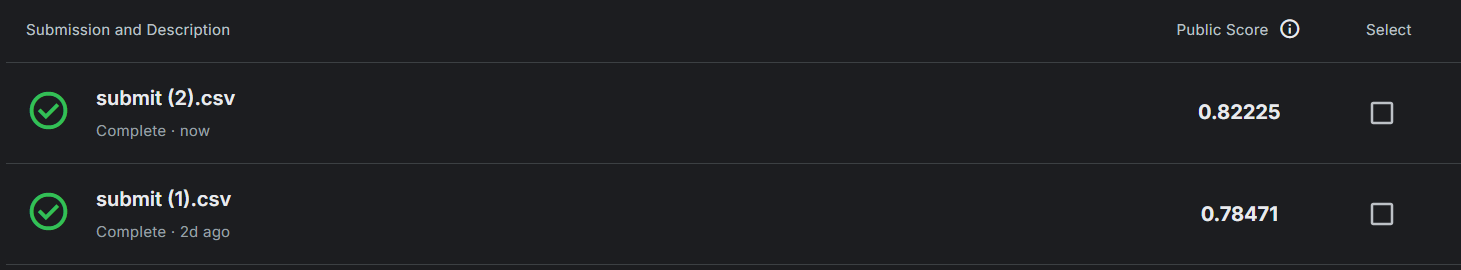

Результат на kaggle:

1. `submit (2).csv` - это  результат, который мы получили с помощью нашего решения, но когда переобучили модель на всем наборе данных.
2. `submit (1).csv` - это  результат, который мы получили с помощью нашего решения, но когда мы пренебрегли переобучением модели на всем наборе данных. Мы разделили исходный `train.csv` на train и test подчасти и обучили модель на train подчасти, оценили на test подчасти, а потом сделали итоговое предсказание на `test.csv`.

